In [1]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [2]:
import pandas as pd
import numpy as np
from collections import Counter
from scipy.stats import skew, kurtosis, describe
import datetime, time
#from plotly.plotly import iplot
#import plotly.graph_objs as go
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
start=datetime.datetime.now()

# The Basa Dataset

### 1) Description (see BASA Overview.docx)

## Quick Data Exploration

### 2) Load dataset

In [3]:
basa=pd.read_csv('./Data/BASA_AUC_2028_912.csv')

### 3) Check data has been uploaded

In [4]:
print(len(basa), 'observations')
print(basa.columns)
basa['flags']=[[]]*len(basa)
basa.head()

114162 observations
Index(['X', 'Airfield', 'S2', 'Wait_Time', 'C_Start', 'C0', 'C_avg',
       'Sch_Departure', 'Act_Departure', 'BFO_Dest_City',
       'BFO_Destination_Country_Code', 'order', 'Pass_ID', 'Departure_Date',
       'Departure_Time', 'Time_of_Day', 'Period_of_Week', 'Day_of_Week',
       'Month', 'Season', 'Year'],
      dtype='object')


,X,Airfield,S2,Wait_Time,C_Start,C0,C_avg,Sch_Departure,Act_Departure,BFO_Dest_City,...,Pass_ID,Departure_Date,Departure_Time,Time_of_Day,Period_of_Week,Day_of_Week,Month,Season,Year,flags
0,1057198,AUC,2028-08-31 18:57:00,14.0,2.0,2.0,2.0,2028-08-31 20:16:00,2028-08-31 20:16:00,VES064,...,5345525.0,2028-08-31,72960,4 - EVENING,2 - WEEKEND,4 - THU,08 - AUG,3 - SUMMER,2028,[]
1,1057199,AUC,2028-08-31 18:54:00,NaN,NaN,2.0,NaN,2028-08-31 20:16:00,2028-08-31 20:16:00,VES064,...,5345639.0,2028-08-31,72960,4 - EVENING,2 - WEEKEND,4 - THU,08 - AUG,3 - SUMMER,2028,[]
2,1057200,AUC,2028-08-31 18:54:00,NaN,NaN,2.0,NaN,2028-08-31 20:16:00,2028-08-31 20:16:00,VES064,...,5345644.0,2028-08-31,72960,4 - EVENING,2 - WEEKEND,4 - THU,08 - AUG,3 - SUMMER,2028,[]
3,1057201,AUC,2028-08-31 18:59:00,5.0,2.0,1.0,1.5,2028-08-31 20:16:00,2028-08-31 20:16:00,VES064,...,5345654.0,2028-08-31,72960,4 - EVENING,2 - WEEKEND,4 - THU,08 - AUG,3 - SUMMER,2028,[]
4,1057202,AUC,2028-08-31 18:56:00,NaN,NaN,2.0,NaN,2028-08-31 20:16:00,2028-08-31 20:16:00,VES064,...,5345679.0,2028-08-31,72960,4 - EVENING,2 - WEEKEND,4 - THU,08 - AUG,3 - SUMMER,2028,[]


### 4) Identify variables

| Column | Type   | Format |
|--------|--------|--------|
| X | index/numerical | integer |
| Airfield | categorical | factor |
| S2 | continuous | datetime |
| Wait_Time | continuous | float |
| C_Start | continuous | float |
| C_avg | continuous | float |
| Sch_Departure | continuous | datetime |
| Act_Departure | continuous | datetime |
| order | numerical | integer |
| Pass_ID | numerical | integer |
| Departure_Date | continuous | datetime |
| Departure_Time | continuous | integer |
| Time_of_Day | categorical | factor |
| Period_of_Week | categorical | factor |
| Day_of_Week | categorical | factor |
| Month | categorical | factor |
| Season | categorical | factor |
| Year | continuous | integer |

In [11]:
#preview column
col='Time_of_Day'
basa.head()[col]

0    4 - EVENING
1    4 - EVENING
2    4 - EVENING
3    4 - EVENING
4    4 - EVENING
Name: Time_of_Day, dtype: object

### 5) Identify mismatch between expected and actual datatypes

In [12]:
#actual datatypes in each column
for col in basa.columns:
    print(col, '\t', Counter([type(x) for x in basa[col]]))

X 	 Counter({<class 'numpy.int64'>: 114162})
Airfield 	 Counter({<class 'str'>: 114162})
S2 	 Counter({<class 'str'>: 114162})
Wait_Time 	 Counter({<class 'numpy.float64'>: 114162})
C_Start 	 Counter({<class 'numpy.float64'>: 114162})
C0 	 Counter({<class 'numpy.float64'>: 114162})
C_avg 	 Counter({<class 'numpy.float64'>: 114162})
Sch_Departure 	 Counter({<class 'str'>: 114162})
Act_Departure 	 Counter({<class 'str'>: 114162})
BFO_Dest_City 	 Counter({<class 'str'>: 114159, <class 'float'>: 3})
BFO_Destination_Country_Code 	 Counter({<class 'str'>: 114159, <class 'float'>: 3})
order 	 Counter({<class 'numpy.int64'>: 114162})
Pass_ID 	 Counter({<class 'numpy.float64'>: 114162})
Departure_Date 	 Counter({<class 'str'>: 114162})
Departure_Time 	 Counter({<class 'numpy.int64'>: 114162})
Time_of_Day 	 Counter({<class 'str'>: 114162})
Period_of_Week 	 Counter({<class 'str'>: 114162})
Day_of_Week 	 Counter({<class 'str'>: 114162})
Month 	 Counter({<class 'str'>: 114162})
Season 	 Counter({<c

Note: In pandas, missing data is recorded as 'NaN' which is of type numpy.float64 or float.

#### Pass_ID should be integer...
but column is of type numpy float because it contains NaN values (type float)

#### Fix BFO_Dest_City and BFO_Destination_Country_Code NA Values

BFO_Dest_City and BFO_Destination_Country_Code should be of type string but could have missing data which is recorded as a float

In [13]:
#replace nan values with '.'
for i,row in basa.iterrows():
    if type(row['BFO_Dest_City'])==float:
        if np.isnan(row['BFO_Dest_City']):
            basa.set_value(i,['BFO_Dest_City'],'.')
            basa.set_value(i,'flags',row['flags']+['TYPE - BFO_Dest_City'])
    if type(row['BFO_Destination_Country_Code'])==float:
        if np.isnan(row['BFO_Destination_Country_Code']):
            basa.set_value(i,['BFO_Destination_Country_Code'],'.')
            basa.set_value(i,'flags',row['flags']+['TYPE - BFO_Dest_City'])
            
for col in ['BFO_Dest_City','BFO_Destination_Country_Code']:
    print(col, '\t', Counter([type(x) for x in basa[col]]))
    print(Counter(basa[col]))

BFO_Dest_City 	 Counter({<class 'str'>: 114162})
Counter({'QUE': 52167, 'CWL': 24945, 'VES033': 14305, 'VES064': 8597, 'SAF': 5601, 'SCO032': 5342, 'NEN003': 2752, 'SCO051': 256, 'SCO039': 41, 'BOR030': 27, 'VES078': 19, 'SCO048': 14, 'SCO050': 11, 'VES016': 9, 'SCO002': 9, '     .': 8, 'VES009': 7, 'VES066': 6, 'VES023': 5, 'WIC003': 5, 'VES052': 4, 'VES058': 4, 'VES077': 3, 'VES020': 3, '.': 3, 'VES065': 2, 'VES021': 2, 'VES045': 2, 'BOR008': 2, 'VES054': 2, 'VES034': 2, 'VES074': 1, 'VES079': 1, 'VES018': 1, 'VES062': 1, 'VES056': 1, 'BOR050': 1, 'VES071': 1})
BFO_Destination_Country_Code 	 Counter({<class 'str'>: 114162})
Counter({'BOR': 82743, 'VES': 22978, 'SCO': 5673, 'NEN': 2752, '  .': 8, 'WIC': 5, '.': 3})


Fix leading whitespace on NA values

In [14]:
for col in ['BFO_Dest_City','BFO_Destination_Country_Code']:
    basa[col]=[x.lstrip() for x in basa[col]]

#### Covnvert to datetime
S2, Sch_Departure, Act_Departure, and Departure_Date should be converted from strings to pandas datetime.

In [15]:
for col in ['S2', 'Sch_Departure', 'Act_Departure']:
    basa[col]=pd.to_datetime(basa[col]).dt.to_pydatetime()
    print(col, '\t', Counter([type(x) for x in basa[col]]))

S2 	 Counter({<class 'pandas._libs.tslib.Timestamp'>: 114162})
Sch_Departure 	 Counter({<class 'pandas._libs.tslib.Timestamp'>: 114162})
Act_Departure 	 Counter({<class 'pandas._libs.tslib.Timestamp'>: 114162})


In [16]:
basa['Departure_Date']=pd.to_datetime(basa['Departure_Date']).dt.date
print('Departure_Date', '\t', Counter([type(x) for x in basa['Departure_Date']]))

Departure_Date 	 Counter({<class 'datetime.date'>: 114162})


#### Departure Time

In [17]:
min(basa.Departure_Time)/60/60,max(basa.Departure_Time)/60/60

(0.016666666666666666, 23.933333333333334)

Based on the range of departure times, we can infer that the integer represents the number of seconds from the start of the day (12am)

### 6) Continuous Data

In [18]:
for col in ['Wait_Time', 'C_Start', 'C0', 'C_avg','order', 'Pass_ID',
       'Departure_Time']:
    n_obs=len(basa)
    missing=basa[col].isnull().sum()
    print(col)
    print('# Observations (not incl. missing):',n_obs-missing)
    print('# Missing values:',missing, '\t% Missing values: {}%'.format(round(missing/n_obs*100,3)))
    print(basa[col].describe())
    print('skew\t', basa[col].skew())
    print('kurtosis\t', basa[col].kurt())
    print('\n')

Wait_Time
# Observations (not incl. missing): 97277
# Missing values: 16885 	% Missing values: 14.79%
count    97277.000000
mean         5.409038
std          4.561542
min          1.000000
25%          3.000000
50%          4.000000
75%          7.000000
max         75.000000
Name: Wait_Time, dtype: float64
skew	 2.33488075574
kurtosis	 8.26830595721


C_Start
# Observations (not incl. missing): 97277
# Missing values: 16885 	% Missing values: 14.79%
count    97277.000000
mean         1.365698
std          0.508680
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: C_Start, dtype: float64
skew	 0.81195759463
kurtosis	 -0.631785384432


C0
# Observations (not incl. missing): 114161
# Missing values: 1 	% Missing values: 0.001%
count    114161.000000
mean          1.379744
std           0.518215
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           3.000000
Name: C0, dtyp

#### Datetime Data

In [19]:
for col in ['S2', 'Sch_Departure', 'Act_Departure', 'Departure_Date']:
    n_obs=len(basa)
    missing=basa[col].isnull().sum()
    print(col)
    print('# Observations (not incl. missing):',n_obs-missing)
    print('# Missing values:',missing, '\t% Missing values: {}%'.format(round(missing/n_obs*100,3)))
    print(basa[col].describe())
    unixts = [time.mktime(dt.timetuple()) for dt in basa[col]]
    print('Statistics for the UNIX Timestamp')
    print(describe(unixts))
    print('\n')

S2
# Observations (not incl. missing): 114162
# Missing values: 0 	% Missing values: 0.0%
count                  114162
unique                  63200
top       2028-11-25 18:34:00
freq                       10
first     2028-08-01 21:02:00
last      2028-12-31 20:26:00
Name: S2, dtype: object
Statistics for the UNIX Timestamp
DescribeResult(nobs=114162, minmax=(1848790920.0, 1861925160.0), mean=1856856042.8385978, variance=9336763118290.0137, skewness=-0.015086601910702494, kurtosis=-1.210848425473054)


Sch_Departure
# Observations (not incl. missing): 114162
# Missing values: 0 	% Missing values: 0.0%
count                  114162
unique                   3443
top       2028-10-28 19:56:00
freq                      229
first     2028-08-01 21:55:00
last      2028-12-31 20:16:00
Name: Sch_Departure, dtype: object
Statistics for the UNIX Timestamp
DescribeResult(nobs=114162, minmax=(1848794100.0, 1861924560.0), mean=1856861856.2432332, variance=9337008848295.9824, skewness=-0.015151200

### 7) Categorical Data

In [20]:
for col in ['Airfield', 'BFO_Dest_City', 'BFO_Destination_Country_Code', 'Time_of_Day', 'Period_of_Week', 'Day_of_Week',
       'Month', 'Season', 'Year']:

    counter=Counter(basa[col])
    n_obs=len(basa)
    missing=basa[col].isnull().sum()
    if col in ['BFO_Dest_City', 'BFO_Destination_Country_Code']:
        missing+=basa[col].tolist().count('.')
    print(col)
    print('# Observations (not incl. missing):',n_obs-missing)
    print('# Missing values:',missing, '\t% Missing values: {}%'.format(round(missing/n_obs*100,3)))
    print('Mode:', counter.most_common(1)[0][0], '\t\tMode %:', round(counter.most_common(1)[0][1]/n_obs*100,3))
    try:
        print('2nd Mode:', counter.most_common(2)[1][0], '\t\t2nd Mode %:', round(counter.most_common(2)[1][1]/n_obs*100,3))
    except:
        print('No 2nd Mode')
        
    print(counter)
    print('\n')

Airfield
# Observations (not incl. missing): 114162
# Missing values: 0 	% Missing values: 0.0%
Mode: AUC 		Mode %: 100.0
No 2nd Mode
Counter({'AUC': 114162})


BFO_Dest_City
# Observations (not incl. missing): 114151
# Missing values: 11 	% Missing values: 0.01%
Mode: QUE 		Mode %: 45.696
2nd Mode: CWL 		2nd Mode %: 21.851
Counter({'QUE': 52167, 'CWL': 24945, 'VES033': 14305, 'VES064': 8597, 'SAF': 5601, 'SCO032': 5342, 'NEN003': 2752, 'SCO051': 256, 'SCO039': 41, 'BOR030': 27, 'VES078': 19, 'SCO048': 14, '.': 11, 'SCO050': 11, 'VES016': 9, 'SCO002': 9, 'VES009': 7, 'VES066': 6, 'VES023': 5, 'WIC003': 5, 'VES052': 4, 'VES058': 4, 'VES077': 3, 'VES020': 3, 'VES065': 2, 'VES021': 2, 'VES045': 2, 'BOR008': 2, 'VES054': 2, 'VES034': 2, 'VES074': 1, 'VES079': 1, 'VES018': 1, 'VES062': 1, 'VES056': 1, 'BOR050': 1, 'VES071': 1})


BFO_Destination_Country_Code
# Observations (not incl. missing): 114151
# Missing values: 11 	% Missing values: 0.01%
Mode: BOR 		Mode %: 72.479
2nd Mode: VES 		2n

### 8) Problems

* Most of the observations are marked "WEEKEND" but the mode for Day_of_Week is Thursday.

## Data Quality

### 9) Data Quality Issues

Possible data quality issues:
* invalid entries
    * Although we have checked that our data types are correct, there could be invalid formats (ex. Day_of_Week should be of the form '# - ABC')
* incomplete entries
    * NaN values
* inconsistent entries
    * Day_of_Week and Period_of_Week (ex. Weekend and Thursday)
    * Month and Season (ex. December and Summer)
    * Actual_Departure < S2
    * Destination City is not in Destination Country
    * Act_Departure not the same date as Departure_Date and not same time as Departure_Time
    * Flight with multiple actual departure times
* duplicate entries
    * Look for duplicates of Pass_ID and Sch_Departure and/or Dest_City

#### Act_Departure Date vs Departure Date
We want to make sure the date of Act_departure is consistent with the Departure_Date column

In [21]:
basa[basa['Act_Departure'].apply(lambda x: x.date()) != basa['Departure_Date']]

,X,Airfield,S2,Wait_Time,C_Start,C0,C_avg,Sch_Departure,Act_Departure,BFO_Dest_City,...,Pass_ID,Departure_Date,Departure_Time,Time_of_Day,Period_of_Week,Day_of_Week,Month,Season,Year,flags


#### Act_Departure Time vs Departure Time
We want to check for inconsistencies between the Act_departure and the Departure_Time column. Calculations of very small inconsistencies in the following code will be due to rounding errors and should be ignored.

In [22]:
for i,row in basa.iterrows():
    difference=((row['Act_Departure']-datetime.datetime.combine(row['Act_Departure'].date(), datetime.datetime.min.time())).total_seconds()) - row['Departure_Time']
    if difference>1 or difference<-1:
        print('inconsistency in observation {}'.format(i))

#### Time of Day vs. Departure Time
We see that the time of day and departure times agree.

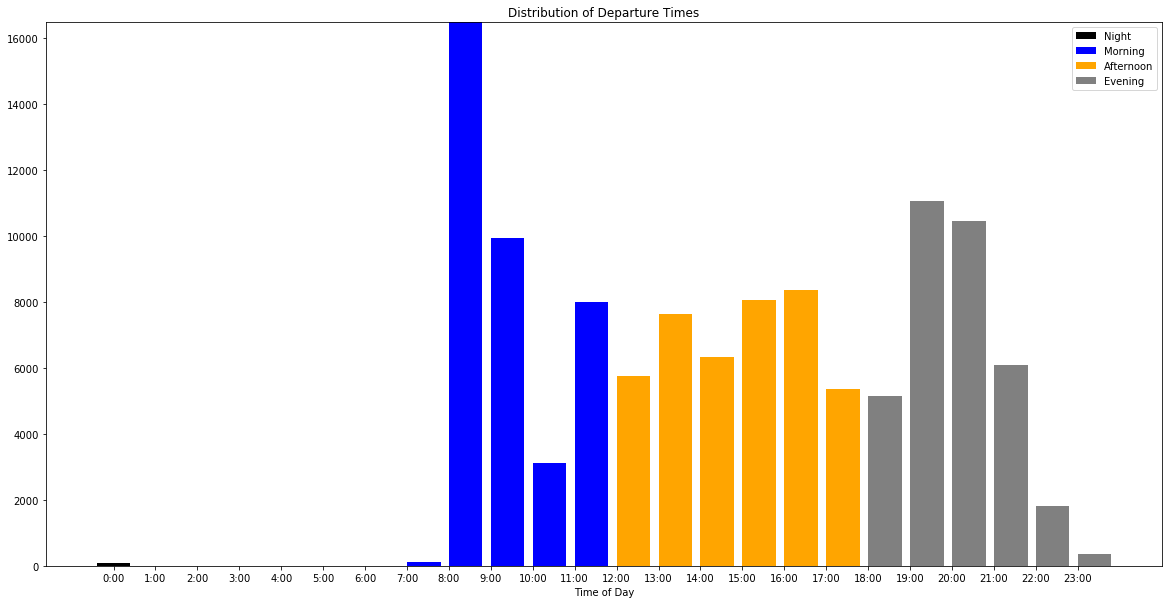

In [23]:
night=basa.query("Time_of_Day == '1 - NIGHT'")['Departure_Time']
morning=basa.query("Time_of_Day == '2 - MORNING'")['Departure_Time']
afternoon=basa.query("Time_of_Day == '3 - AFTERNOON'")['Departure_Time']
evening=basa.query("Time_of_Day == '4 - EVENING'")['Departure_Time']

plt.subplots(figsize=(20, 10))
b1=plt.bar(range(24), 
           np.histogram(night, bins=[t*60*60 for t in range(25)])[0],
           color = 'black'
          )
b2=plt.bar(range(24), 
           np.histogram(morning, bins=[t*60*60 for t in range(25)])[0], 
           bottom = np.histogram(night, bins=[t*60*60 for t in range(25)])[0],
           color ='blue',
           align='edge'
          )
b3=plt.bar(range(24), 
           np.histogram(afternoon, bins=[t*60*60 for t in range(25)])[0], 
           bottom = [sum(x) for x in zip(np.histogram(night, bins=[t*60*60 for t in range(25)])[0], np.histogram(morning, bins=[t*60*60 for t in range(25)])[0])],
           color ='orange',
           align='edge'
          )
b4=plt.bar(range(24), 
           np.histogram(evening, bins=[t*60*60 for t in range(25)])[0], 
           bottom = [sum(x) for x in zip(np.histogram(night, bins=[t*60*60 for t in range(25)])[0], 
                                         np.histogram(morning, bins=[t*60*60 for t in range(25)])[0],
                                         np.histogram(afternoon, bins=[t*60*60 for t in range(25)])[0]
                                        )],
           color ='grey', 
           align='edge'
          )
plt.xticks(range(24), ['{}:00'.format(t) for t in range(24)])
plt.legend((b1[0], b2[0],b3[0],b4[0]), ('Night', 'Morning', 'Afternoon', 'Evening'))
plt.xlabel('Time of Day')
plt.title('Distribution of Departure Times')
plt.show()

#### Period of Week vs. Day of Week
It seems that the weekday and weekend tags have been switched.

In [24]:
PoW=pd.DataFrame(columns=sorted(list(set(basa.Day_of_Week))))
for col in PoW.columns:
    PoW.set_value('1 - WEEKDAY',col,len(basa.query("Period_of_Week == '1 - WEEKDAY' & Day_of_Week == '{}'".format(col))))
    PoW.set_value('2 - WEEKEND',col,len(basa.query("Period_of_Week == '2 - WEEKEND' & Day_of_Week == '{}'".format(col))))
PoW

,1 - MON,2 - TUE,3 - WED,4 - THU,5 - FRI,6 - SAT,7 - SUN
1 - WEEKDAY,0,0,0,0,0,18249,15523
2 - WEEKEND,12755,14618,18170,19911,14936,0,0


In [25]:
for i,row in basa.iterrows():
    if row['Day_of_Week'] in ['6 - SAT','7 - SUN']:
        basa.set_value(i,'Period_of_Week','2 - WEEKEND')
    else:
        basa.set_value(i,'Period_of_Week','1 - WEEKDAY')
    basa.set_value(i,'flags',row['flags']+['INC - Period_of_Week'])

#### Season vs. Month
Season and Month seem to agree.

In [26]:
Season=pd.DataFrame(columns=sorted(list(set(basa.Month))))
for col in Season.columns:
    Season.set_value('3 - SUMMER',col,len(basa.query("Season == '3 - SUMMER' & Month == '{}'".format(col))))
    Season.set_value('4 - AUTUMN',col,len(basa.query("Season == '4 - AUTUMN' & Month == '{}'".format(col))))
Season

,08 - AUG,09 - SEP,10 - OCT,11 - NOV,12 - DEC
3 - SUMMER,21,25605,0,0,0
4 - AUTUMN,0,0,29077,27880,31579


#### Multiple actual departure times for a single scheduled flight
There are 112 flights for which we see multiple recorded actual departure times. Therefore, it seem there is inconsistency in the data.

In [27]:
temp1=basa.loc[:,['Airfield','BFO_Dest_City','BFO_Destination_Country_Code','Sch_Departure','Act_Departure']].drop_duplicates()
temp2=temp1.groupby(['Airfield','BFO_Dest_City','BFO_Destination_Country_Code','Sch_Departure']).count()
len(temp2.query('Act_Departure > 1'))

112

In [28]:
inconsistent=[]
for i,row in temp2.query('Act_Departure > 1').iterrows():
    x=temp1.query("Airfield == '{}' & BFO_Dest_City == '{}' & BFO_Destination_Country_Code == '{}' & Sch_Departure == '{}'".format(i[0],i[1],i[2],i[3]))['Act_Departure']
    print(x)
    inconsistent=inconsistent+list(x.index)

21677   2028-09-17 20:11:00
21686   2028-09-17 20:29:00
Name: Act_Departure, dtype: datetime64[ns]
21834   2028-09-19 08:46:00
21842   2028-09-19 09:10:00
Name: Act_Departure, dtype: datetime64[ns]
22003   2028-09-20 08:46:00
22013   2028-09-20 08:59:00
Name: Act_Departure, dtype: datetime64[ns]
22176   2028-09-21 08:46:00
22184   2028-09-21 08:56:00
Name: Act_Departure, dtype: datetime64[ns]
9876    2028-09-23 10:02:00
22504   2028-09-23 09:46:00
Name: Act_Departure, dtype: datetime64[ns]
22641   2028-09-24 08:46:00
22650   2028-09-24 08:54:00
Name: Act_Departure, dtype: datetime64[ns]
22789   2028-09-25 08:46:00
22797   2028-09-25 09:10:00
Name: Act_Departure, dtype: datetime64[ns]
22876   2028-09-26 08:46:00
22881   2028-09-26 08:53:00
Name: Act_Departure, dtype: datetime64[ns]
23003   2028-09-27 08:46:00
23004   2028-09-27 08:53:00
Name: Act_Departure, dtype: datetime64[ns]
23196   2028-09-28 08:31:00
23198   2028-09-28 08:46:00
Name: Act_Departure, dtype: datetime64[ns]
23195   20

84497   2028-12-01 08:46:00
84568   2028-12-01 21:16:00
Name: Act_Departure, dtype: datetime64[ns]
99946   2028-12-02 09:16:00
99958   2028-12-02 09:25:00
Name: Act_Departure, dtype: datetime64[ns]
100052   2028-12-03 09:16:00
100068   2028-12-03 09:26:00
Name: Act_Departure, dtype: datetime64[ns]
100264   2028-12-06 09:16:00
100265   2028-12-06 09:37:00
Name: Act_Departure, dtype: datetime64[ns]
101132   2028-12-20 09:16:00
101137   2028-12-20 09:55:00
Name: Act_Departure, dtype: datetime64[ns]
108620   2028-12-23 08:16:00
108638   2028-12-23 08:56:00
Name: Act_Departure, dtype: datetime64[ns]
101436   2028-12-23 09:16:00
101437   2028-12-23 10:11:00
Name: Act_Departure, dtype: datetime64[ns]
89855   2028-12-27 21:11:00
89906   2028-12-27 21:23:00
Name: Act_Departure, dtype: datetime64[ns]
90380   2028-12-30 21:11:00
90441   2028-12-30 21:21:00
Name: Act_Departure, dtype: datetime64[ns]
67951   2028-11-11 08:40:00
67952   2028-11-11 08:46:00
Name: Act_Departure, dtype: datetime64[ns]


In [29]:
for i,row in basa.iterrows():
    if i in inconsistent:
        basa.set_value(i,'flags',row['flags']+['INC - Act_Departure'])

### 10) Derived Variables

In [30]:
for i,row in basa.iterrows():
    if row['Wait_Time']==row['Wait_Time']:
        S1=row['S2']-datetime.timedelta(minutes=row['Wait_Time'])
        basa.set_value(i,'S1 - Scheduled Departure Time',float((S1-row['Sch_Departure']).total_seconds()))
        basa.set_value(i,'S1 - Actual Departure Time',float((S1-row['Act_Departure']).total_seconds()))
    basa.set_value(i,'S2 - Scheduled Departure Time',float((row['S2']-row['Sch_Departure']).total_seconds()))
    basa.set_value(i,'S2 - Actual Departure Time',float((row['S2']-row['Act_Departure']).total_seconds()))
basa.head()

,X,Airfield,S2,Wait_Time,C_Start,C0,C_avg,Sch_Departure,Act_Departure,BFO_Dest_City,...,Period_of_Week,Day_of_Week,Month,Season,Year,flags,S1 - Scheduled Departure Time,S1 - Actual Departure Time,S2 - Scheduled Departure Time,S2 - Actual Departure Time
0,1057198,AUC,2028-08-31 18:57:00,14.0,2.0,2.0,2.0,2028-08-31 20:16:00,2028-08-31 20:16:00,VES064,...,1 - WEEKDAY,4 - THU,08 - AUG,3 - SUMMER,2028,[INC - Period_of_Week],-5580.0,-5580.0,-4740.0,-4740.0
1,1057199,AUC,2028-08-31 18:54:00,NaN,NaN,2.0,NaN,2028-08-31 20:16:00,2028-08-31 20:16:00,VES064,...,1 - WEEKDAY,4 - THU,08 - AUG,3 - SUMMER,2028,[INC - Period_of_Week],NaN,NaN,-4920.0,-4920.0
2,1057200,AUC,2028-08-31 18:54:00,NaN,NaN,2.0,NaN,2028-08-31 20:16:00,2028-08-31 20:16:00,VES064,...,1 - WEEKDAY,4 - THU,08 - AUG,3 - SUMMER,2028,[INC - Period_of_Week],NaN,NaN,-4920.0,-4920.0
3,1057201,AUC,2028-08-31 18:59:00,5.0,2.0,1.0,1.5,2028-08-31 20:16:00,2028-08-31 20:16:00,VES064,...,1 - WEEKDAY,4 - THU,08 - AUG,3 - SUMMER,2028,[INC - Period_of_Week],-4920.0,-4920.0,-4620.0,-4620.0
4,1057202,AUC,2028-08-31 18:56:00,NaN,NaN,2.0,NaN,2028-08-31 20:16:00,2028-08-31 20:16:00,VES064,...,1 - WEEKDAY,4 - THU,08 - AUG,3 - SUMMER,2028,[INC - Period_of_Week],NaN,NaN,-4800.0,-4800.0


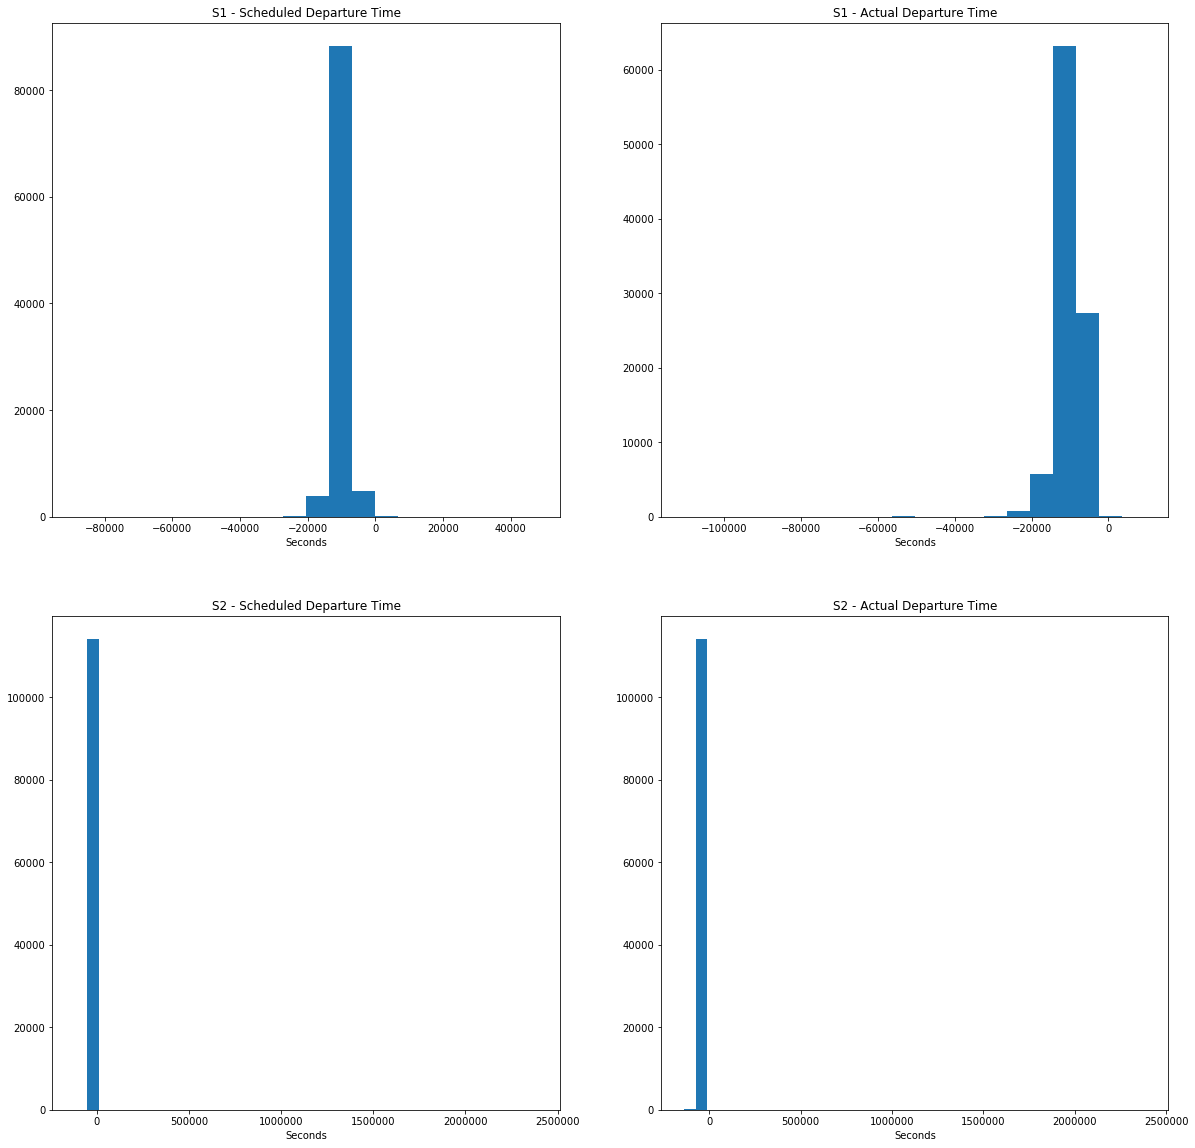

In [31]:
plt.figure(1)
plt.subplots(figsize=(20, 20))

plt.subplot(221)
hist=np.histogram(basa['S1 - Scheduled Departure Time'].dropna(), bins=20)
plt.bar(hist[1][:-1],hist[0], width=(hist[1][-1]-hist[1][0])/20)
plt.title('S1 - Scheduled Departure Time')
plt.xlabel('Seconds')

plt.subplot(222)
hist=np.histogram(basa['S1 - Actual Departure Time'].dropna(), bins=20)
plt.bar(hist[1][:-1],hist[0], width=(hist[1][-1]-hist[1][0])/20)
plt.title('S1 - Actual Departure Time')
plt.xlabel('Seconds')

plt.subplot(223)
hist=np.histogram(basa['S2 - Scheduled Departure Time'], bins=40)
plt.bar(hist[1][:-1],hist[0], width=(hist[1][-1]-hist[1][0])/40)
plt.title('S2 - Scheduled Departure Time')
plt.xlabel('Seconds')

plt.subplot(224)
hist=np.histogram(basa['S2 - Actual Departure Time'], bins=40)
plt.bar(hist[1][:-1],hist[0], width=(hist[1][-1]-hist[1][0])/40)
plt.title('S2 - Actual Departure Time')
plt.xlabel('Seconds')

plt.show()

In [32]:
print('S1 - Scheduled Departure Time\n',basa['S1 - Scheduled Departure Time'].dropna().describe(),'\n')
print('S1 - Actual Departure Time\n',basa['S1 - Actual Departure Time'].dropna().describe())
print('S2 - Scheduled Departure Time\n',basa['S2 - Scheduled Departure Time'].dropna().describe(),'\n')
print('S2 - Actual Departure Time\n',basa['S2 - Actual Departure Time'].dropna().describe(),'\n')

S1 - Scheduled Departure Time
 count    97277.000000
mean     -6222.800045
std       2532.350019
min     -85200.000000
25%      -7320.000000
50%      -6060.000000
75%      -4920.000000
max      51120.000000
Name: S1 - Scheduled Departure Time, dtype: float64 

S1 - Actual Departure Time
 count     97277.000000
mean      -7085.734963
std        3509.910411
min     -107400.000000
25%       -8100.000000
50%       -6480.000000
75%       -5280.000000
max       12600.000000
Name: S1 - Actual Departure Time, dtype: float64
S2 - Scheduled Departure Time
 count    1.141620e+05
mean    -5.813405e+03
std      8.060558e+03
min     -8.508000e+04
25%     -7.020000e+03
50%     -5.700000e+03
75%     -4.500000e+03
max      2.417580e+06
Name: S2 - Scheduled Departure Time, dtype: float64 

S2 - Actual Departure Time
 count    1.141620e+05
mean    -6.725380e+03
std      8.420787e+03
min     -1.059600e+05
25%     -7.800000e+03
50%     -6.120000e+03
75%     -4.860000e+03
max      2.417580e+06
Name: S2 - Ac

We observe that the times between the scans and scheduled departure time are normally distributed. People tend to aim to get to security about an hour and a half before scheduled departure and expect to be through security with about half an hour to an hour before departure.
When we look at the actual departure times, the time difference is skewed to the right. More people are cutting it closer to the actual departure time. This could also be because fewer flights are delayed longer. (See joint distributions)

A scan after the scheduled departure is possible if the flight is delayed but if a passenger goes through security after actual departure then either they have missed their flight, or the actual departure time is wrong.

In [33]:
missed_flight=basa[[t>0 for t in basa['S2 - Actual Departure Time']]]
print(len(missed_flight))
missed_flight.head()

168


,X,Airfield,S2,Wait_Time,C_Start,C0,C_avg,Sch_Departure,Act_Departure,BFO_Dest_City,...,Period_of_Week,Day_of_Week,Month,Season,Year,flags,S1 - Scheduled Departure Time,S1 - Actual Departure Time,S2 - Scheduled Departure Time,S2 - Actual Departure Time
8616,373482,AUC,2028-09-02 16:45:00,NaN,NaN,1.0,NaN,2028-09-02 12:26:00,2028-09-02 12:26:00,BOR030,...,2 - WEEKEND,6 - SAT,09 - SEP,3 - SUMMER,2028,[INC - Period_of_Week],NaN,NaN,15540.0,15540.0
8617,373487,AUC,2028-09-12 17:36:00,NaN,NaN,1.0,NaN,2028-09-12 12:46:00,2028-09-12 12:44:00,BOR030,...,1 - WEEKDAY,2 - TUE,09 - SEP,3 - SUMMER,2028,[INC - Period_of_Week],NaN,NaN,17400.0,17520.0
8618,373488,AUC,2028-09-13 16:25:00,NaN,NaN,1.0,NaN,2028-09-13 11:31:00,2028-09-13 11:28:00,BOR030,...,1 - WEEKDAY,3 - WED,09 - SEP,3 - SUMMER,2028,[INC - Period_of_Week],NaN,NaN,17640.0,17820.0
8619,373489,AUC,2028-09-16 15:47:00,NaN,NaN,1.0,NaN,2028-09-16 15:01:00,2028-09-16 14:56:00,BOR030,...,2 - WEEKEND,6 - SAT,09 - SEP,3 - SUMMER,2028,[INC - Period_of_Week],NaN,NaN,2760.0,3060.0
35665,373492,AUC,2028-10-08 13:50:00,NaN,NaN,1.0,NaN,2028-10-08 11:41:00,2028-10-08 11:54:00,BOR030,...,2 - WEEKEND,7 - SUN,10 - OCT,4 - AUTUMN,2028,[INC - Period_of_Week],NaN,NaN,7740.0,6960.0


In [34]:
for i,row in basa.iterrows():
    if row['S2 - Actual Departure Time']>0:
        if 'INC - Act_Departure' not in row['flags']:
            basa.set_value(i,'flags',row['flags']+['INC - S2'])
            print('S2 for observation {} tagged as inconsistent'.format(i))

S2 for observation 8616 tagged as inconsistent
S2 for observation 8617 tagged as inconsistent
S2 for observation 8618 tagged as inconsistent
S2 for observation 8619 tagged as inconsistent
S2 for observation 35665 tagged as inconsistent
S2 for observation 35666 tagged as inconsistent
S2 for observation 41768 tagged as inconsistent
S2 for observation 47483 tagged as inconsistent
S2 for observation 54964 tagged as inconsistent
S2 for observation 54965 tagged as inconsistent
S2 for observation 54966 tagged as inconsistent
S2 for observation 55008 tagged as inconsistent
S2 for observation 55009 tagged as inconsistent
S2 for observation 55010 tagged as inconsistent
S2 for observation 55011 tagged as inconsistent
S2 for observation 55012 tagged as inconsistent
S2 for observation 57554 tagged as inconsistent
S2 for observation 57555 tagged as inconsistent
S2 for observation 57556 tagged as inconsistent
S2 for observation 57558 tagged as inconsistent
S2 for observation 57563 tagged as inconsist

### 11) C_0, C_avg, C_start
C_0 and C_start should not be drastically different and C_avg should be roughly the average of C_0 and C_start.

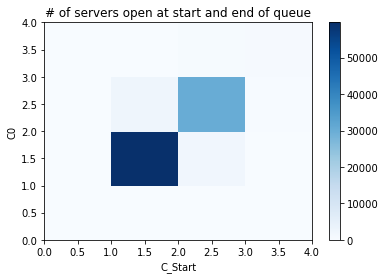

In [35]:
count=Counter([tuple(row) for i,row in basa.loc[:,['C0','C_Start']].dropna(how='any').iterrows()])

C=pd.DataFrame()
for k,v in sorted(count.items()):
    C.set_value(k[0],k[1],v)
C.fillna(0, inplace=True)

plt.pcolor(C, cmap='Blues')
plt.colorbar()
plt.xlabel('C_Start')
plt.ylabel('C0')
plt.title('# of servers open at start and end of queue')
plt.show()

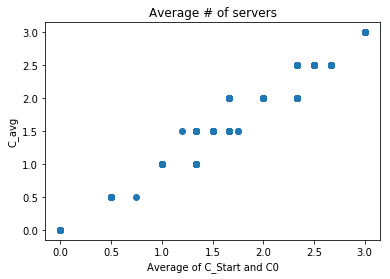

In [36]:
temp=basa.loc[:,['C0','C_Start','C_avg']].dropna(how='any')
plt.plot(temp.C_avg, [(row['C0'] + row['C_Start'])/2 for i,row in temp.iterrows()],'o')
plt.xlabel('Average of C_Start and C0')
plt.ylabel('C_avg')
plt.title('Average # of servers')
plt.show()

### 12) Uniquely identifying scans, passengers and flights
* Scans should be uniquely identified by the Airfield and order number
* Passengers should be uniquely identified by their Pass_ID
* Flights should be uniquely identified by departure (date and time), destination city and destination country. In this dataset, destination country is not required but in the case that there are two cities with the same name in different countries, we will index over country as well.

A passenger should be scanned once per flight and should not be on more than one flight at a given time

In [37]:
Counter(basa['Pass_ID']).most_common(5)

[(5345525.0, 1),
 (5345639.0, 1),
 (5345644.0, 1),
 (5345654.0, 1),
 (5345679.0, 1)]

There are no duplicate passenger IDs so we will not find the same passenger on two different flights for this dataset. However, for a larger dataset we should check this.

### 13) Flags
Inconsistent entries are remedied and flagged as 'INC - [column that was edited or removed]'

## Missing Values

### 14) Missing Values: Reasoning
* An observation is likely to be missing Wait_Time, C_avg and C_start values if the passenger's boarding pass was not scanned at $S_1$
* Other missing values may be due to data entry errors

### 15) Missing Values per Observation

In [5]:
cols=basa.columns

data = [go.Bar(
            x=cols,
            y=[basa[col].isnull().sum()+basa[col].tolist().count('.') for col in cols]
    )]

layout = go.Layout(
    title='Missing Values per Observation',
    xaxis = {'title':'Variable'},
    yaxis = {'title':'# of Missing Values'}
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Wait_Time, C_Start and C_avg have each have a large number of missing values. In this case, the observations with values missing should NOT be deleted.

### 16) Missing Value Mechnanisms
* It seems that many passengers were not scanned at $S_1$. Reasons for this could be that the queue was so short (or there was no lineup) that there was no point scanning the passenger when they entered the queue.
* Other missing values for Pass_ID, BFO_Dest_City, etc. are likely due to data input error. 

### 17) Other Missing Values
It could be acceptable to delete observations with values missing for columns Pass_ID given the relatively infrequent occurence of missing data for these fields and the fact that it is impossible to infer these values. 

If we had a value for the destination city but were missing the country, we could probably infer. However, observations happen to be missing both. Another clue to what the destination should be could come from looking up other observations with the same scheduled and actual departure times. If we find an observation with matching data then we can impute that value. Otherwise, flag for deletion.

In [42]:
missing_dest=basa.query("BFO_Dest_City == '.' | BFO_Destination_Country_Code == '.'").loc[:,['BFO_Dest_City','BFO_Destination_Country_Code','Sch_Departure','Act_Departure']]
missing_dest

,BFO_Dest_City,BFO_Destination_Country_Code,Sch_Departure,Act_Departure
21,.,.,2028-09-03 13:17:00,2028-09-03 13:17:00
22,.,.,2028-09-15 09:41:00,2028-09-15 09:41:00
25626,.,.,2028-10-03 09:46:00,2028-10-03 13:16:00
25627,.,.,2028-10-28 08:16:00,2028-10-28 08:16:00
54703,.,.,2028-11-05 12:05:00,2028-11-05 12:05:00
54704,.,.,2028-11-05 12:05:00,2028-11-05 12:05:00
82583,.,.,2028-12-21 19:36:00,2028-12-21 19:48:00
82584,.,.,2028-12-15 21:35:00,2028-12-15 21:35:00
82585,.,.,2028-12-16 16:01:00,2028-12-16 16:30:00
82586,.,.,2028-12-28 08:16:00,2028-12-28 08:16:00


In [43]:
for i,row in missing_dest.iterrows():
    print('Possible Destinations for observation {}'.format(i))
    possible_dest=basa.query("Sch_Departure == '{}' & Act_Departure == '{}' & BFO_Dest_City != '.'".format(row['Sch_Departure'],row['Act_Departure']))
    possible_dest=possible_dest.loc[:,['BFO_Dest_City','BFO_Destination_Country_Code']].drop_duplicates()
    print(possible_dest)
    
    if len(possible_dest)==1:
        basa.set_value(i,'BFO_Dest_City',possible_dest.iloc[0]['BFO_Dest_City'])
        basa.set_value(i,'BFO_Destination_Country_Code',possible_dest.iloc[0]['BFO_Destination_Country_Code'])
        basa.set_value(i,'flags',basa.loc[i]['flags']+['IMP - BFO_Dest_City,BFO_Destination_Country_Code'])
    else:
        basa.set_value(i,'flags',basa.loc[i]['flags']+['DEL'])
        
    print()

Possible Destinations for observation 21
      BFO_Dest_City BFO_Destination_Country_Code
12306        VES033                          VES

Possible Destinations for observation 22
      BFO_Dest_City BFO_Destination_Country_Code
10926           QUE                          BOR

Possible Destinations for observation 25626
      BFO_Dest_City BFO_Destination_Country_Code
48335           CWL                          BOR

Possible Destinations for observation 25627
      BFO_Dest_City BFO_Destination_Country_Code
47806           QUE                          BOR
54689        VES077                          VES

Possible Destinations for observation 54703
      BFO_Dest_City BFO_Destination_Country_Code
75171           QUE                          BOR

Possible Destinations for observation 54704
      BFO_Dest_City BFO_Destination_Country_Code
54703           QUE                          BOR

Possible Destinations for observation 82583
Empty DataFrame
Columns: [BFO_Dest_City, BFO_Destinatio

For the missing value for C_0, me may impute it using another observation with similar time $S_2$ or close pass order (and at the same airfield) if exists. Otherwise, again we can just delete it.

In [44]:
basa.query('C0 != C0')

,X,Airfield,S2,Wait_Time,C_Start,C0,C_avg,Sch_Departure,Act_Departure,BFO_Dest_City,...,Period_of_Week,Day_of_Week,Month,Season,Year,flags,S1 - Scheduled Departure Time,S1 - Actual Departure Time,S2 - Scheduled Departure Time,S2 - Actual Departure Time
57819,284127,AUC,2028-11-05 08:38:00,NaN,NaN,NaN,NaN,2028-11-05 11:12:00,2028-11-05 11:35:00,QUE,...,2 - WEEKEND,7 - SUN,11 - NOV,4 - AUTUMN,2028,[INC - Period_of_Week],NaN,NaN,-9240.0,-10620.0


In [45]:
basa.query("(5974030 <= order <= 5974040 | '2028-11-05 08:34:00' <= S2 <= '2028-11-05 08:42:00') & Airfield == 'AUC'")

,X,Airfield,S2,Wait_Time,C_Start,C0,C_avg,Sch_Departure,Act_Departure,BFO_Dest_City,...,Period_of_Week,Day_of_Week,Month,Season,Year,flags,S1 - Scheduled Departure Time,S1 - Actual Departure Time,S2 - Scheduled Departure Time,S2 - Actual Departure Time
57819,284127,AUC,2028-11-05 08:38:00,NaN,NaN,NaN,NaN,2028-11-05 11:12:00,2028-11-05 11:35:00,QUE,...,2 - WEEKEND,7 - SUN,11 - NOV,4 - AUTUMN,2028,[INC - Period_of_Week],NaN,NaN,-9240.0,-10620.0
63839,417079,AUC,2028-11-05 08:34:00,3.0,1.0,1.0,1.0,2028-11-05 10:26:00,2028-11-05 10:45:00,NEN003,...,2 - WEEKEND,7 - SUN,11 - NOV,4 - AUTUMN,2028,[INC - Period_of_Week],-6900.0,-8040.0,-6720.0,-7860.0
64669,458904,AUC,2028-11-05 08:34:00,2.0,1.0,1.0,1.0,2028-11-05 09:36:00,2028-11-05 09:36:00,CWL,...,2 - WEEKEND,7 - SUN,11 - NOV,4 - AUTUMN,2028,[INC - Period_of_Week],-3840.0,-3840.0,-3720.0,-3720.0
64670,458905,AUC,2028-11-05 08:41:00,1.0,1.0,1.0,1.0,2028-11-05 09:36:00,2028-11-05 09:36:00,CWL,...,2 - WEEKEND,7 - SUN,11 - NOV,4 - AUTUMN,2028,[INC - Period_of_Week],-3360.0,-3360.0,-3300.0,-3300.0


Given the nearest observations, we impute the missing C0 value to be 1.0.

In [46]:
basa.set_value(57819, 'C0', 1.0)
basa.set_value(57819, 'flags', basa.loc[57819]['flags']+['IMP - C0'])
basa['C0'].describe()

count    114162.000000
mean          1.379741
std           0.518214
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           3.000000
Name: C0, dtype: float64

### 18) Flagging Data
* Imputed data is flagged as 'IMP - [column(s) imputed]'
* Deleted data is flagged as 'DEL'

In [47]:
basa[basa['flags'].apply(lambda x: 'DEL' in x)]

,X,Airfield,S2,Wait_Time,C_Start,C0,C_avg,Sch_Departure,Act_Departure,BFO_Dest_City,...,Period_of_Week,Day_of_Week,Month,Season,Year,flags,S1 - Scheduled Departure Time,S1 - Actual Departure Time,S2 - Scheduled Departure Time,S2 - Actual Departure Time
25627,51823,AUC,2028-10-28 06:43:00,6.0,2.0,2.0,2.0,2028-10-28 08:16:00,2028-10-28 08:16:00,.,...,2 - WEEKEND,6 - SAT,10 - OCT,4 - AUTUMN,2028,"[INC - Period_of_Week, DEL]",-5940.0,-5940.0,-5580.0,-5580.0
82583,10200,AUC,2028-12-21 16:18:00,NaN,NaN,1.0,NaN,2028-12-21 19:36:00,2028-12-21 19:48:00,.,...,1 - WEEKDAY,4 - THU,12 - DEC,4 - AUTUMN,2028,"[TYPE - BFO_Dest_City, INC - Period_of_Week, DEL]",NaN,NaN,-11880.0,-12600.0


## Anomalous Observations

### 19) Anomalous Observations for each variable

#### Wait Time
According to the boxplot, a wait time of over 15 minutes is anomalous. However from the histogram, we see that wait time is exponentially distributed. Therefore, higher values are always less likely. One could calculate a threshold for outliers in an exponential-like distribution but from looking at the plots, I would say a wait time over 50 minutes is anomalous.

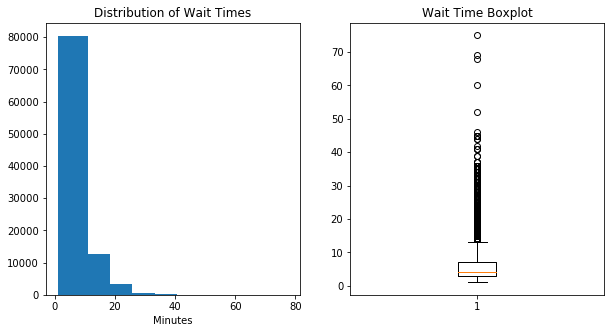

In [48]:
plt.figure(1)
plt.subplots(figsize=(10, 5))

plt.subplot(121)
wt=np.histogram(basa['Wait_Time'].dropna())
plt.bar(wt[1][:-1],wt[0], width=10, align='edge')
plt.title('Distribution of Wait Times')
plt.xlabel('Minutes')

plt.subplot(122)
plt.boxplot(basa['Wait_Time'].dropna())
plt.title('Wait Time Boxplot')

plt.show()

#### C0, C_Start, C_avg
From number of servers ranges from 0 to 3. Statistically, no observations are anomalous but it is extremely rare to have 0 servers open (and does not make much sense). I would therefore mark observations with 0 servers as anomalous

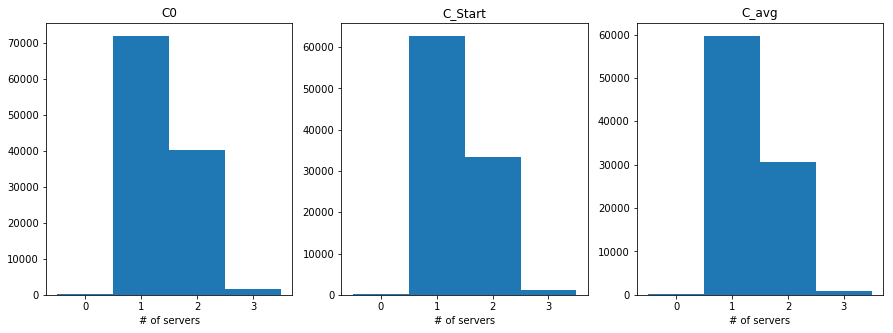

In [49]:
plt.figure(1)
plt.subplots(figsize=(15, 5))

plt.subplot(131)
count=Counter(basa['C0'].dropna())
plt.bar(list(count.keys()),list(count.values()), width=1)
plt.title('C0')
plt.xlabel('# of servers')

plt.subplot(132)
count=Counter(basa['C_Start'].dropna())
plt.bar(list(count.keys()),list(count.values()), width=1)
plt.title('C_Start')
plt.xlabel('# of servers')

plt.subplot(133)
count=Counter(basa['C_avg'].dropna())
plt.bar(list(count.keys()),list(count.values()), width=1)
plt.title('C_avg')
plt.xlabel('# of servers')

plt.show()

#### Departure_Time
A value less that 25000 is anomalous but could make sense if the flight was due to depart late the previous day but was delayed.

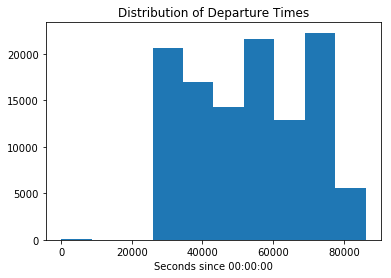

In [50]:
dt=np.histogram(basa['Departure_Time'])
plt.bar(dt[1][:-1],dt[0], width=dt[1][-1]/10, align='edge')
plt.title('Distribution of Departure Times')
plt.xlabel('Seconds since 00:00:00')
plt.show()

#### Order
It seems as though there is missing data for earlier scans. Therefore, we will mark the observations less than 5300000 as anomalous.

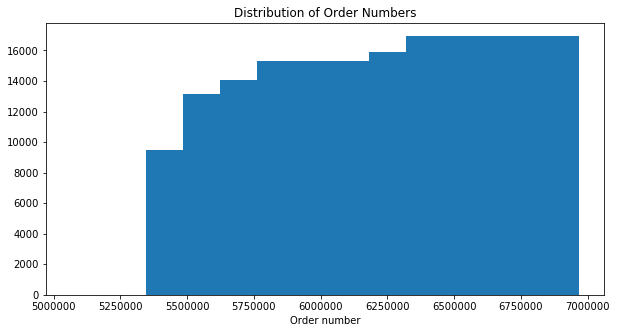

In [51]:
plt.subplots(figsize=(10, 5))
order=np.histogram(basa['order'])
plt.bar(order[1][:-1],order[0], width=order[1][-1]/10, align='edge')
plt.title('Distribution of Order Numbers')
plt.xlabel('Order number')
plt.show()

#### Categorical Factors
For categorical variables it is fairly easy to tell outliers from looking at the distribution.
* Note that there are onl 80 'NIGHT' observations. This could be because flights aren't usually scheduled at night but may have been recorded during that time period due to delays.
* Also, there are only 21 observations for August -- Perhaps because they only started recording data near the end of that month.
* Some destinations only have a few flights. For example, in approximately four months there were only five recorded flights to 'WIC'. This is possible, but given how most airlines operate, this is anomalous. Some destination cities with 3-digit codes have low counts. To properly determine whether this is anomalous, one would have to know more about how they code their cities.

In [52]:
for col in ['Airfield', 'BFO_Dest_City', 'BFO_Destination_Country_Code', 'Time_of_Day', 'Period_of_Week', 'Day_of_Week',
       'Month', 'Season', 'Year']:
    print(col, ':', Counter(basa[col]), '\n')

Airfield : Counter({'AUC': 114162}) 

BFO_Dest_City : Counter({'QUE': 52172, 'CWL': 24948, 'VES033': 14306, 'VES064': 8597, 'SAF': 5601, 'SCO032': 5342, 'NEN003': 2752, 'SCO051': 256, 'SCO039': 41, 'BOR030': 27, 'VES078': 19, 'SCO048': 14, 'SCO050': 11, 'VES016': 9, 'SCO002': 9, 'VES009': 7, 'VES066': 6, 'VES023': 5, 'WIC003': 5, 'VES052': 4, 'VES058': 4, 'VES077': 3, 'VES020': 3, 'VES065': 2, 'VES021': 2, 'VES045': 2, '.': 2, 'BOR008': 2, 'VES054': 2, 'VES034': 2, 'VES074': 1, 'VES079': 1, 'VES018': 1, 'VES062': 1, 'VES056': 1, 'BOR050': 1, 'VES071': 1}) 

BFO_Destination_Country_Code : Counter({'BOR': 82751, 'VES': 22979, 'SCO': 5673, 'NEN': 2752, 'WIC': 5, '.': 2}) 

Time_of_Day : Counter({'3 - AFTERNOON': 41496, '2 - MORNING': 37644, '4 - EVENING': 34942, '1 - NIGHT': 80}) 

Period_of_Week : Counter({'1 - WEEKDAY': 80390, '2 - WEEKEND': 33772}) 

Day_of_Week : Counter({'4 - THU': 19911, '6 - SAT': 18249, '3 - WED': 18170, '7 - SUN': 15523, '5 - FRI': 14936, '2 - TUE': 14618, '1 - M

#### Datetimes
We will observe anomalous datetimes from the joint distributions.

### 20) Joint Distributions

#### Wait Time vs S2
The wait time should gradually change over time. For example, if a passenger waited 5 minutes in line, the following passenger scanned a minute later should not have waited half an hour in line. Therefore a sudden fluctuation in wait time would be considered anomalous. It seems, from the plot, that these are the same anomalous values found from the single distribution.

From this distribution we also see that there were a few scans near the beginning of August but then a large gap in the number of scans. The time values may not be anomalous but rather there is a lot of missing data.

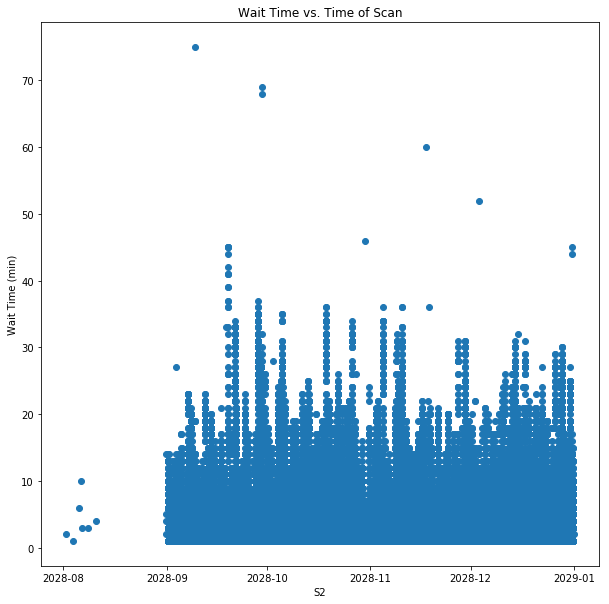

In [53]:
plt.subplots(figsize=(10, 10))
plt.plot(basa['S2'], basa['Wait_Time'], 'o')
plt.title('Wait Time vs. Time of Scan')
plt.xlabel('S2')
plt.ylabel('Wait Time (min)')
plt.show()

#### Destination Country vs City

In [54]:
df=pd.DataFrame(columns=sorted(list(set(basa.BFO_Dest_City))))
for col in df.columns:
    for row in sorted(list(set(basa.BFO_Destination_Country_Code))):
        df.set_value(row,col,len(basa.query("BFO_Destination_Country_Code == '{}' & BFO_Dest_City == '{}'".format(row,col))))
df

,.,BOR008,BOR030,BOR050,CWL,NEN003,QUE,SAF,SCO002,SCO032,...,VES062,VES064,VES065,VES066,VES071,VES074,VES077,VES078,VES079,WIC003
.,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BOR,0,2,27,1,24948,0,52172,5601,0,0,...,0,0,0,0,0,0,0,0,0,0
NEN,0,0,0,0,0,2752,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SCO,0,0,0,0,0,0,0,0,9,5342,...,0,0,0,0,0,0,0,0,0,0
VES,0,0,0,0,0,0,0,0,0,0,...,1,8597,2,6,1,1,3,19,1,0
WIC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


#### Destination City vs Month
We expect to see roughly the same number of scans for each destination city each month, expect perhaps in December as more people fly around Christmas and New Year's. From the following contingency table, Many cities seem to be missing data particularly for earlier months. These counts are not so much as anomalous but one must take into account the lack of data.

In [55]:
df=pd.DataFrame(columns=sorted(list(set(basa.BFO_Dest_City))))
for col in df.columns:
    for row in sorted(list(set(basa.Month))):
        df.set_value(row,col,len(basa.query("Month == '{}' & BFO_Dest_City == '{}'".format(row,col))))
df

,.,BOR008,BOR030,BOR050,CWL,NEN003,QUE,SAF,SCO002,SCO032,...,VES062,VES064,VES065,VES066,VES071,VES074,VES077,VES078,VES079,WIC003
08 - AUG,0,0,0,0,0,0,0,0,0,0,...,0,11,2,0,0,1,1,5,1,0
09 - SEP,0,0,4,0,6629,752,13072,0,0,0,...,0,1917,0,3,0,0,0,0,0,0
10 - OCT,1,2,2,0,7718,727,14533,107,0,227,...,1,2161,0,0,0,0,2,11,0,1
11 - NOV,0,0,10,0,5396,731,12815,1617,5,1699,...,0,1984,0,3,0,0,0,3,0,4
12 - DEC,1,0,11,1,5205,542,11752,3877,4,3416,...,0,2524,0,0,1,0,0,0,0,0


#### Scheduled vs Actual Departure Times
The following charts compare scheduled and actual departure times to analyse delays. Most flights are not delayed more than 2.5 hours and do not depart more than half an hour early but I would deem delays of over 9 hours (32400 seconds) or early departures of more than 0.5 hours (1800 seconds) anomalous.

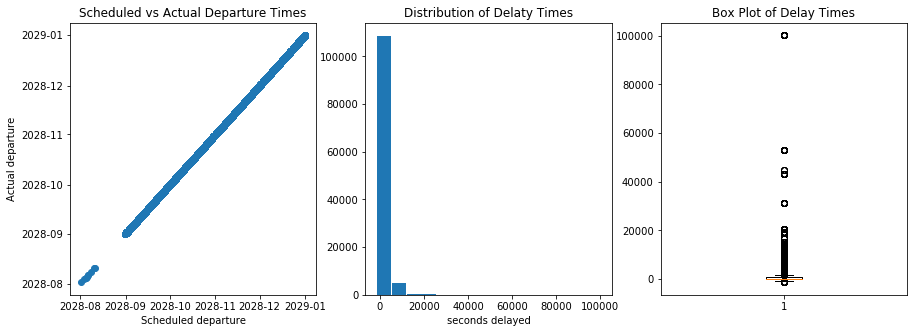

(array([108597,   4764,    512,    144,     23,      0,     44,      0,
            44,      0,      0,      0,      0,      0,     34]),
 array([  -1440.,    5336.,   12112.,   18888.,   25664.,   32440.,
          39216.,   45992.,   52768.,   59544.,   66320.,   73096.,
          79872.,   86648.,   93424.,  100200.]))

In [56]:
plt.figure(1)
plt.subplots(figsize=(15, 5))

plt.subplot(131)
plt.plot(basa['Sch_Departure'], basa['Act_Departure'], 'o')
plt.title('Scheduled vs Actual Departure Times')
plt.xlabel('Scheduled departure')
plt.ylabel('Actual departure')

delay=[time.mktime(y.timetuple()) - time.mktime(x.timetuple()) for x,y in zip(basa['Sch_Departure'], basa['Act_Departure'])]

plt.subplot(132)
d=np.histogram(delay, bins=15)
plt.bar(d[1][:-1],d[0], width=d[1][-1]/15, align='edge')
plt.title('Distribution of Delaty Times')
plt.xlabel('seconds delayed')

plt.subplot(133)
plt.boxplot(delay)
plt.title('Box Plot of Delay Times')

plt.show()

d

### 21) Flags
Anomalous data is flagged as 'ANO - [anomalous field]'

In [57]:
for i,row in basa.iterrows():
    if row['Wait_Time']>50:
        basa.set_value(i,'flags', row['flags']+['ANO - Wait_Time'])

    for col in ['C0','C_Start','C_avg']:
        if row[col]==0:
            basa.set_value(i,'flags', row['flags']+['ANO - {}'.format(col)])
            
    if row['order']<5300000:
        basa.set_value(i,'flags', row['flags']+['ANO - order'])
        
    delay=time.mktime(row['Act_Departure'].timetuple()) - time.mktime(row['Sch_Departure'].timetuple())
    if delay > 32400 or delay < -1800:
        basa.set_value(i,'flags', row['flags']+['ANO - Act_Departure'])
            

## Save to CSV

In [58]:
basa[basa['flags'].apply(lambda x: 'DEL' not in x)].to_csv('./Data/BASA_clean.csv')

## Derived Datasets

In [59]:
basa_clean=pd.read_csv('./Data/BASA_clean.csv')
basa.head()

,X,Airfield,S2,Wait_Time,C_Start,C0,C_avg,Sch_Departure,Act_Departure,BFO_Dest_City,...,Period_of_Week,Day_of_Week,Month,Season,Year,flags,S1 - Scheduled Departure Time,S1 - Actual Departure Time,S2 - Scheduled Departure Time,S2 - Actual Departure Time
0,1057198,AUC,2028-08-31 18:57:00,14.0,2.0,2.0,2.0,2028-08-31 20:16:00,2028-08-31 20:16:00,VES064,...,1 - WEEKDAY,4 - THU,08 - AUG,3 - SUMMER,2028,[INC - Period_of_Week],-5580.0,-5580.0,-4740.0,-4740.0
1,1057199,AUC,2028-08-31 18:54:00,NaN,NaN,2.0,NaN,2028-08-31 20:16:00,2028-08-31 20:16:00,VES064,...,1 - WEEKDAY,4 - THU,08 - AUG,3 - SUMMER,2028,[INC - Period_of_Week],NaN,NaN,-4920.0,-4920.0
2,1057200,AUC,2028-08-31 18:54:00,NaN,NaN,2.0,NaN,2028-08-31 20:16:00,2028-08-31 20:16:00,VES064,...,1 - WEEKDAY,4 - THU,08 - AUG,3 - SUMMER,2028,[INC - Period_of_Week],NaN,NaN,-4920.0,-4920.0
3,1057201,AUC,2028-08-31 18:59:00,5.0,2.0,1.0,1.5,2028-08-31 20:16:00,2028-08-31 20:16:00,VES064,...,1 - WEEKDAY,4 - THU,08 - AUG,3 - SUMMER,2028,[INC - Period_of_Week],-4920.0,-4920.0,-4620.0,-4620.0
4,1057202,AUC,2028-08-31 18:56:00,NaN,NaN,2.0,NaN,2028-08-31 20:16:00,2028-08-31 20:16:00,VES064,...,1 - WEEKDAY,4 - THU,08 - AUG,3 - SUMMER,2028,[INC - Period_of_Week],NaN,NaN,-4800.0,-4800.0


### 22) Passenger Dataset

Base column: Pass_ID

In [60]:
passengers=basa_clean.copy()
passengers=passengers.loc[:,['Pass_ID']]
passengers=passengers.drop_duplicates().sort_values('Pass_ID').set_index('Pass_ID')
passengers.head()

""
Pass_ID
5039515.0
5061019.0
5071075.0
5071077.0
5075655.0


Add column: Flights

In [61]:
passengers['Flights']=[[]]*len(passengers)

temp=basa_clean.copy()
temp=temp.loc[:,['Airfield','BFO_Dest_City','BFO_Destination_Country_Code','Sch_Departure','Pass_ID']]
temp.set_index('Pass_ID', inplace=True)

for i,row in passengers.head().iterrows():
    fls=temp.loc[i]
    try:
        fl=[' '.join(list(flight)) for ind,flight in fls.iterrows()]
    except:
        fl=[' '.join(list(fls))]
    passengers.set_value(i,'Flights',fl)
passengers.head()

,Flights
Pass_ID,
5039515.0,[AUC VES078 VES 2028-08-01 21:55:00]
5061019.0,[AUC VES078 VES 2028-08-03 21:55:00]
5071075.0,[AUC VES078 VES 2028-08-04 21:55:00]
5071077.0,[AUC VES078 VES 2028-08-04 21:55:00]
5075655.0,[AUC VES077 VES 2028-08-05 14:56:00]


In [62]:
print(len(passengers))
passengers.head()

114156


,Flights
Pass_ID,
5039515.0,[AUC VES078 VES 2028-08-01 21:55:00]
5061019.0,[AUC VES078 VES 2028-08-03 21:55:00]
5071075.0,[AUC VES078 VES 2028-08-04 21:55:00]
5071077.0,[AUC VES078 VES 2028-08-04 21:55:00]
5075655.0,[AUC VES077 VES 2028-08-05 14:56:00]


In [63]:
passengers.to_csv('./Data/passengers.csv')

### 23) Flight Dataset

Base columns: 'Airfield', 'BFO_Dest_City', 'BFO_Destination_Country_Code', 'Sch_Departure'

In [64]:
flights=basa_clean.copy()
flights=flights.loc[:,['Airfield','BFO_Dest_City','BFO_Destination_Country_Code','Sch_Departure','Act_Departure']]
flights=flights.drop_duplicates().sort_values('Sch_Departure').reset_index(drop=True)
flights.head()

,Airfield,BFO_Dest_City,BFO_Destination_Country_Code,Sch_Departure,Act_Departure
0,AUC,VES078,VES,2028-08-01 21:55:00,2028-08-02 00:46:00
1,AUC,VES078,VES,2028-08-03 21:55:00,2028-08-03 21:55:00
2,AUC,VES078,VES,2028-08-04 21:55:00,2028-08-04 23:11:00
3,AUC,VES077,VES,2028-08-05 14:56:00,2028-08-05 14:56:00
4,AUC,VES079,VES,2028-08-06 08:17:00,2028-08-06 08:17:00


Add column: passengers

In [65]:
flights['Passengers']=[[]]*len(flights)
temp=basa_clean.copy()
temp=temp.set_index(['Airfield','BFO_Dest_City','BFO_Destination_Country_Code','Sch_Departure'])

for i,row in flights.iterrows():
    psngs=temp.loc[row['Airfield'],row['BFO_Dest_City'],row['BFO_Destination_Country_Code'],row['Sch_Departure']]['Pass_ID']
    flights.set_value(i,'Passengers',list(psngs))
    
flights.head()

/Users/ionabuchanan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: PerformanceWarning:

indexing past lexsort depth may impact performance.



,Airfield,BFO_Dest_City,BFO_Destination_Country_Code,Sch_Departure,Act_Departure,Passengers
0,AUC,VES078,VES,2028-08-01 21:55:00,2028-08-02 00:46:00,[5039515.0]
1,AUC,VES078,VES,2028-08-03 21:55:00,2028-08-03 21:55:00,[5061019.0]
2,AUC,VES078,VES,2028-08-04 21:55:00,2028-08-04 23:11:00,"[5071075.0, 5071077.0]"
3,AUC,VES077,VES,2028-08-05 14:56:00,2028-08-05 14:56:00,[5075655.0]
4,AUC,VES079,VES,2028-08-06 08:17:00,2028-08-06 08:17:00,[5081278.0]


In [66]:
len(flights),len(flights.loc[:,['Airfield','BFO_Dest_City','BFO_Destination_Country_Code','Sch_Departure']].drop_duplicates())

(3761, 3646)

In [67]:
print(len(flights))
flights.head()

3761


,Airfield,BFO_Dest_City,BFO_Destination_Country_Code,Sch_Departure,Act_Departure,Passengers
0,AUC,VES078,VES,2028-08-01 21:55:00,2028-08-02 00:46:00,[5039515.0]
1,AUC,VES078,VES,2028-08-03 21:55:00,2028-08-03 21:55:00,[5061019.0]
2,AUC,VES078,VES,2028-08-04 21:55:00,2028-08-04 23:11:00,"[5071075.0, 5071077.0]"
3,AUC,VES077,VES,2028-08-05 14:56:00,2028-08-05 14:56:00,[5075655.0]
4,AUC,VES079,VES,2028-08-06 08:17:00,2028-08-06 08:17:00,[5081278.0]


In [68]:
flights.to_csv('./Data/flights.csv')

### Flight Schedule (Daily)
Most airlines have a standard daily flight schedule (perhaps different on holidays)

In [69]:
daily_flights=basa_clean.copy()
daily_flights=daily_flights.loc[:,['Airfield','BFO_Dest_City','BFO_Destination_Country_Code','Sch_Departure']]
daily_flights['Sch_Departure']=pd.to_datetime(daily_flights['Sch_Departure']).dt.time
daily_flights=daily_flights.drop_duplicates().sort_values('Sch_Departure').reset_index(drop=True)
print(len(daily_flights))
daily_flights.head()

268


,Airfield,BFO_Dest_City,BFO_Destination_Country_Code,Sch_Departure
0,AUC,CWL,BOR,02:16:00
1,AUC,BOR030,BOR,02:31:00
2,AUC,VES033,VES,07:19:00
3,AUC,QUE,BOR,07:40:00
4,AUC,SCO051,SCO,07:40:00


In [70]:
end=datetime.datetime.now()
print('This notebook ran in {} seconds'.format((end-start).total_seconds()))

This notebook ran in 231.082261 seconds
